<b><font size=6 color=mediumblue>Laboratory I – Part B</font></b>

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw

In [3]:
ds = xr.open_dataset('WOA23.nc') #ds is the dataset

In [4]:
p=gsw.conversions.p_from_z(-ds.depth, ds.lat)
ct_an=gsw.conversions.CT_from_t(ds.s_an, ds.t_an, p)
ds['ct_an']=ct_an

---
## 2. Section differences
In this part, you'll subtract the Atlantic property sections from the Pacific property sections so you can more easily look at the differences between the two basins. I've made the code below to create the difference plot for conservative temperature. You'll have to make the other two!
><b><font color='red'>Note:</font></b> When you make a difference plot and you choose to use a diverging colormap like the one I've used below, be sure to <b>use equal and opposite colorbar limits</b> so that zero is centered on the white color (the middle of the colorbar), otherwise your plots will be very confusing! If your set of colorbar limits are not equal and opposite, but this is the range that best shows the differences, then just choose a non-diverging colormap (like the ones we've used above)!

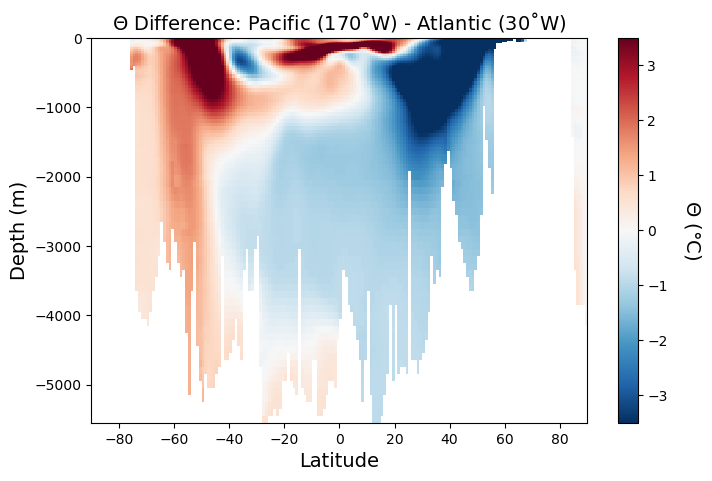

In [5]:
#Conservative temperature difference plot
#plotting a section of Pacific minus Atlantic conservative temperature
#First compute the difference of the two sections
ct_diff=ds['ct_an'].sel(lon=-170,method='nearest')-ds['ct_an'].sel(lon=-30,method='nearest')

#Next, make the figure
fs=14 #fontsize
fig,ax=plt.subplots()
fig.set_size_inches(8,5)
cs=ax.pcolormesh(ds.lat,-ds.depth,ct_diff,vmin=-3.5,vmax=3.5, cmap=plt.cm.RdBu_r)
cbar=plt.colorbar(cs)
plt.ylabel('Depth (m)',fontsize=fs)
plt.xlabel('Latitude',fontsize=fs)
plt.title(r'$\Theta$ Difference: Pacific (170˚W) - Atlantic (30˚W)',fontsize=fs)
cbar.set_label(r'$\Theta$ ($\degree$C)',rotation=270,labelpad=25,fontsize=fs)

#Save the figure
#plt.savefig('PacAtl_cons_temp_diff.pdf')

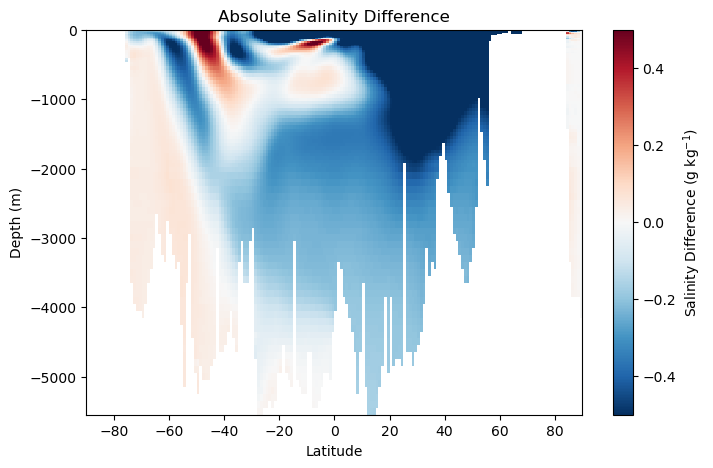

In [6]:
##CODE FOR ABSOLUTE SALINITY DIFFERENCE PLOT HERE
abs_sal = gsw.conversions.SA_from_SP(ds.s_an, p, ds.lon, ds.lat)
ds['abs_sal'] = abs_sal

salt_diff=ds['abs_sal'].sel(lon=-170,method='nearest')-ds['abs_sal'].sel(lon=-30,method='nearest')


fig, ax = plt.subplots(figsize=(8,5))
salt_img =ax.pcolormesh(ds.lat, -ds.depth, salt_diff, vmin=-0.5, vmax=0.5, cmap=plt.cm.RdBu_r)
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('Absolute Salinity Difference')
plt.colorbar(salt_img, label='Salinity Difference (g kg$^{-1}$)')
plt.show()

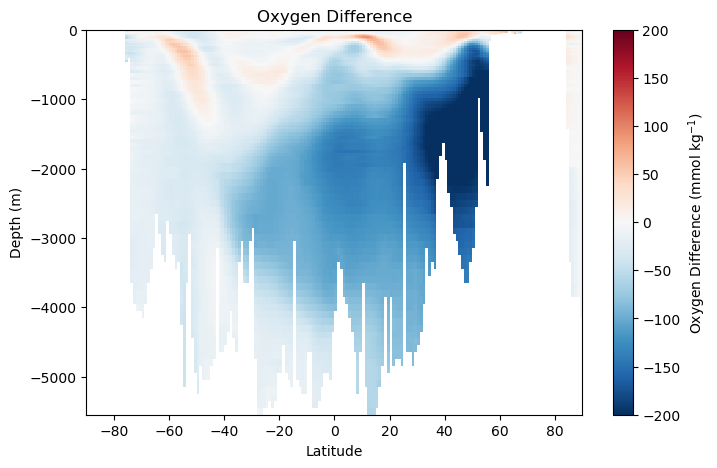

In [9]:
##CODE FOR OXYGEN DIFFERENCE PLOT HERE
oxygen_diff=ds['o_an'].sel(lon=-170,method='nearest')-ds['o_an'].sel(lon=-30,method='nearest')

fig, ax = plt.subplots(figsize=(8,5))
oxygen_img =ax.pcolormesh(ds.lat, -ds.depth, oxygen_diff, vmin=-200, vmax=200, cmap=plt.cm.RdBu_r)
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('Oxygen Difference')
plt.colorbar(oxygen_img, label='Oxygen Difference (mmol kg$^{-1}$)')
plt.show()


#### Take a moment to look at your plots
Write down some general notes describing what you see. For example, where are the maximum and minimum differences between the basins for the three variables? How do these relate to the large-scale wind-driven and overturning circulations and the general ocean surface forcing of heat and freshwater? How are these aspects similar or different in the Atlantic vs. the Pacific?

---
## 3. T-S diagrams
In this section (it's the final section!) you'll make 4 T-S diagrams for Atlantic and Pacific waters in their subtropical gyres along 35˚N and 30˚S, as well as a 5th T-S diagram for an ocean area of your choosing. Making T-S diagrams is a bit more involved than the section plots, so I've set up the code below that you need to make an empty diagram with the correct density contours:

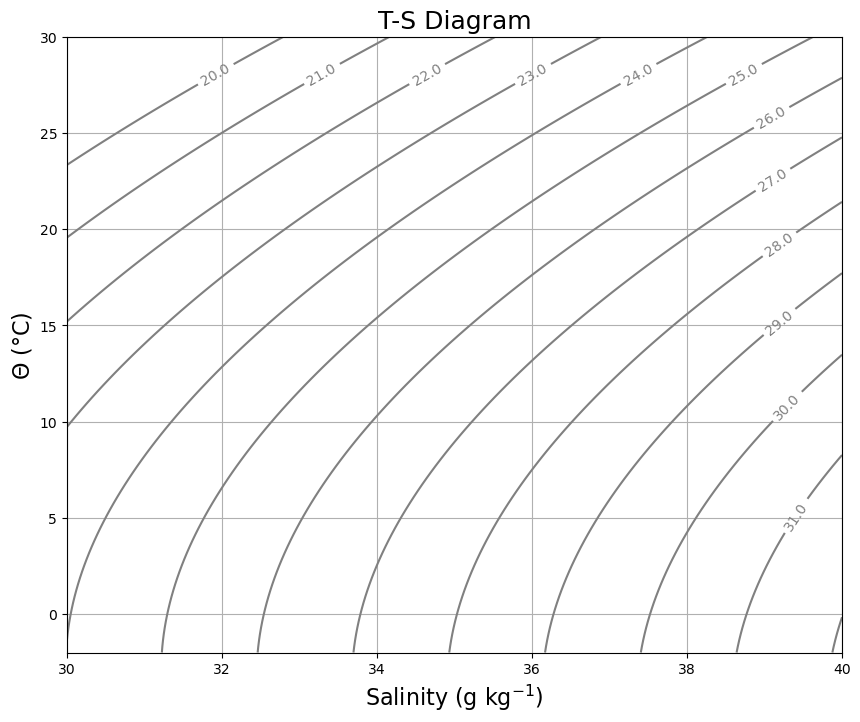

In [10]:
#set up general levels for the T-S plot
Tlevs=np.linspace(-2,30,100)
Slevs=np.linspace(30,40,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

fig,ax=plt.subplots()
fig.set_size_inches(10,8)
cs=ax.contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax.clabel(cs, cs.levels, inline=True, fmt='%0.1f', fontsize=10)
plt.xlabel('Salinity (g kg$^{-1}$)',fontsize=16)
plt.ylabel(r'$\Theta$ ($\degree$C)',fontsize=16)
plt.title('T-S Diagram',fontsize=18)
ax.grid()

### Atlantic
If you want to add data to your plot, you will add it as points in the form of a scatterplot. It will also be helpful to color the points based on their depth, so in our plot we'll also add a colorbar for the depths.

Below I show you how you'd choose all the points along 35˚N in the Atlantic Ocean and add them to the plot. When we extract the data this time, we need to use the ```slice``` option in xarray because we are choosing a range of longitudes (90˚W to 15˚W) that roughly span the Atlantic Ocean at 35˚N. We also need to create a 3-D array of ocean depths so that each point in our scatterplot has a depth associated with it:

In [11]:
#0. First, create a 3D-depth variable so the scatterplot doesn't lose its mind when we try to color points based on depth
#YOU'LL NEED THIS FOR EACH OF YOUR T-S DIAGRAMS so make sure this piece of code has been run BEFORE you try to make your plots
depth_3D=-xr.ones_like(ds.s_an)*ds.depth

In [12]:
#1. Get the data at the location that we want, along 35N, across the Atlantic, and get the corresponding 3D depths
T_35N=ds['ct_an'].sel(lat=35,method='nearest').sel(lon=slice(-90,-15))
S_35N=ds['s_an'].sel(lat=35,method='nearest').sel(lon=slice(-90,-15)) 
depth_35N=depth_3D.sel(lat=35,method='nearest').sel(lon=slice(-90,-15))

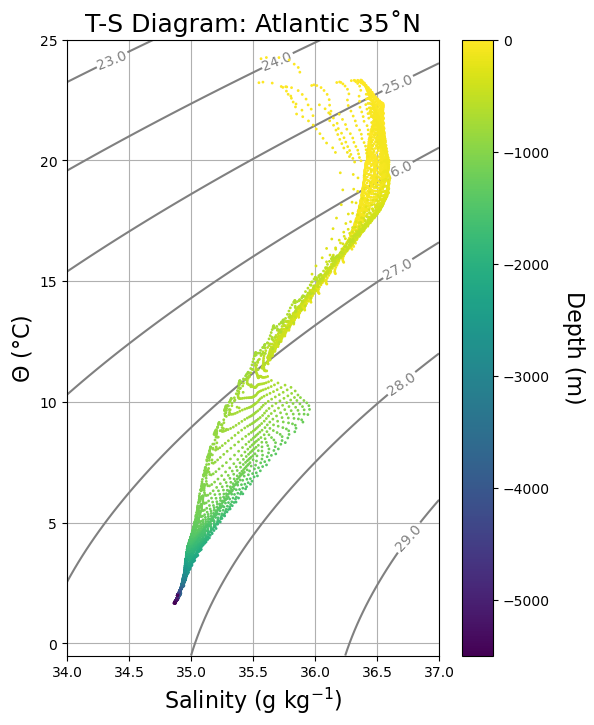

In [23]:
#2. Set up the initial plot using the T-S diagram code from above
#set up general levels for the T-S plot
Tlevs=np.linspace(-0.5,25,100)
Slevs=np.linspace(34,37,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

#3. plot the density contours
fs=16
fig,ax=plt.subplots()
fig.set_size_inches(6,8)
cs=ax.contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax.clabel(cs, cs.levels, inline=True, fmt='%0.1f', fontsize=10)
plt.xlabel('Salinity (g kg$^{-1}$)',fontsize=fs)
plt.ylabel(r'$\Theta$ ($\degree$C)',fontsize=fs)
plt.title('T-S Diagram: Atlantic 35˚N',fontsize=18)
ax.grid()

#4. Plot the data as a scatterplot
cs=ax.scatter(S_35N, T_35N, c=depth_35N,marker='o',s=1,zorder=5)
#s is the marker size; marker is the marker shape, just a dot for now; c=the depth variable we will use to color the dots
#add a colorbar based on depth
cbar=plt.colorbar(cs)
cbar.set_label('Depth (m)',rotation=270,labelpad=25,fontsize=fs)

#Save the figure
#plt.savefig('Atl_TS_diagram_35N.pdf')

Now you try to create the plot for the South Atlantic at 30˚S. Use the longitude range 45˚W to 15˚E, and don't forget to change your plot title and name of the file that you're saving!

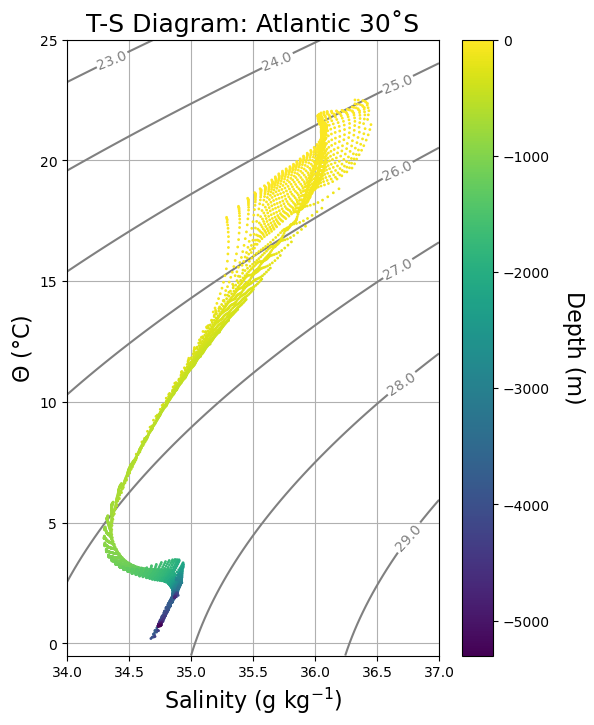

In [21]:
#YOUR T-S CODE HERE

T_30S=ds['ct_an'].sel(lat=-30,method='nearest').sel(lon=slice(-45,15))
S_30S=ds['s_an'].sel(lat=-30,method='nearest').sel(lon=slice(-45,15)) 
depth_30S=depth_3D.sel(lat=-30,method='nearest').sel(lon=slice(-45,15))

Tlevs=np.linspace(-0.5,25,100)
Slevs=np.linspace(34,37,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

fig, ax = plt.subplots(figsize=(6,8))
cs=ax.contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax.clabel(cs, cs.levels, inline=True, fmt='%0.1f', fontsize=10)
plt.xlabel('Salinity (g kg$^{-1}$)',fontsize=fs)
plt.ylabel(r'$\Theta$ ($\degree$C)',fontsize=fs)
plt.title('T-S Diagram: Atlantic 30˚S',fontsize=18)
ax.grid()

cs=ax.scatter(S_30S, T_30S, c=depth_30S,marker='o',s=1,zorder=5)
cbar=plt.colorbar(cs)
cbar.set_label('Depth (m)',rotation=270,labelpad=25,fontsize=fs)


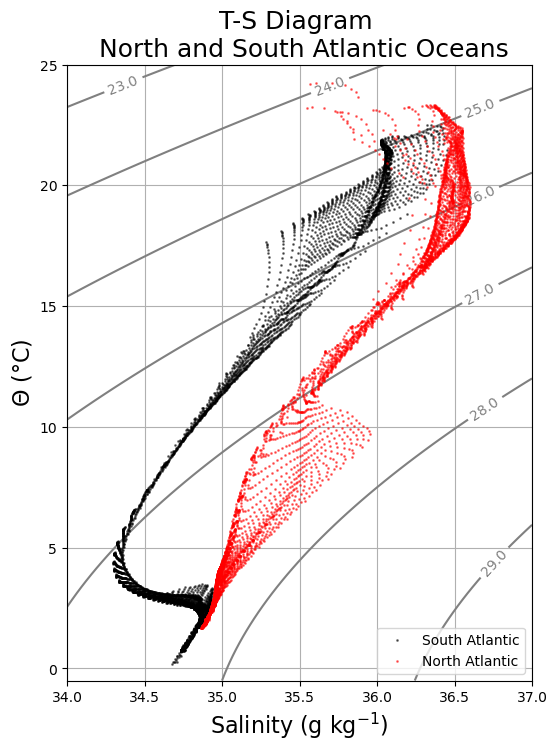

In [30]:
# Compare the two plots

Tlevs=np.linspace(-0.5,25,100)
Slevs=np.linspace(34,37,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

fig, ax = plt.subplots(figsize=(6,8))
cs=ax.contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax.clabel(cs, cs.levels, inline=True, fmt='%0.1f', fontsize=10)
plt.xlabel('Salinity (g kg$^{-1}$)',fontsize=fs)
plt.ylabel(r'$\Theta$ ($\degree$C)',fontsize=fs)
plt.title('T-S Diagram \n North and South Atlantic Oceans',fontsize=18)
ax.grid()

south_atlantic=ax.scatter(S_30S, T_30S, c='black',marker='o',s=1, zorder=4, label='South Atlantic', alpha=0.5)
north_atlantic=ax.scatter(S_35N, T_35N, c='red',marker='o',s=1, zorder=5, label='North Atlantic', alpha=0.5)

plt.legend()

plt.show()

#### Take a moment to look at your plots
Write down some general notes describing what you see in both T-S diagrams for the Atlantic. Are they similar or different? If so, how?  Based on the plots, can you point out the rough location of some of the major water masses of the Atlantic Ocean, like North Atlantic Deep Water and Antarctic Bottom Water?

### Pacific (Bonus question)
Now you'll make T-S diagrams for properties in the Pacific Ocean. Use the following regions for the plots:
1. 35˚N, 130˚E to 120˚W
2. 30˚S, 160˚E to 80˚W
<b> Selecting things across the boundary where the map splits is a little tricky, so run the following block of code to do it correctly</b><br>
There are a number of different ways to do this in xarray (including shifting the dataset, but this can be confusing, so I won't have you do that here):

In [ ]:
# 1a. Get data at 35N and 130E to 120W
T_35N=xr.concat([ds['ct_an'].sel(lat=35,method='nearest').sel(lon=slice(130,None)),
                ds['ct_an'].sel(lat=35,method='nearest').sel(lon=slice(-180,-120))],dim='lon')
S_35N=xr.concat([ds['s_an'].sel(lat=35,method='nearest').sel(lon=slice(130,None)),
                ds['s_an'].sel(lat=35,method='nearest').sel(lon=slice(-180,-120))],dim='lon')
depth_35N=xr.concat([depth_3D.sel(lat=35,method='nearest').sel(lon=slice(130,None)),
                depth_3D.sel(lat=35,method='nearest').sel(lon=slice(-180,-120))],dim='lon')


#1b. Get data at 30s and 160E to 80W
T_30S=xr.concat([ds['ct_an'].sel(lat=-30,method='nearest').sel(lon=slice(160,None)),
                ds['ct_an'].sel(lat=-30,method='nearest').sel(lon=slice(-180,-80))],dim='lon')
S_30S=xr.concat([ds['s_an'].sel(lat=-30,method='nearest').sel(lon=slice(160,None)),
                ds['s_an'].sel(lat=-30,method='nearest').sel(lon=slice(-180,-80))],dim='lon')
depth_30S=xr.concat([depth_3D.sel(lat=-30,method='nearest').sel(lon=slice(160,None)),
                depth_3D.sel(lat=-30,method='nearest').sel(lon=slice(-180,-80))],dim='lon')

Now make your T-S diagrams for the Pacific:

In [ ]:
#YOUR T-S CODE HERE

In [ ]:
#YOUR T-S CODE HERE

#### Take a moment to look at your plots
Write down some general notes describing what you see in both T-S diagrams for the Pacific. Are they similar or different? If so, how?  Based on the plots, can you point out the rough location of some of the major water masses of the Pacific Ocean, like Pacific Deep Water, Antarctic Intermediate Water, and Antarctic Bottom Water? Are there similarities/differences in your Pacific plots vs your Atlantic plots?